<h2><center>Predicting the percentage of marks of student, given number of study of hours</center></h2>

### Importing Required Libraries

**Author:**Sai krishna Kadari

In [50]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set_style('darkgrid')

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [2]:
data=pd.read_csv('student_scores.csv')
data.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


Here **Hours** is feature (independent variable) and **Scores** is Target (dependent variable).

In [3]:
data.shape

(25, 2)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
Hours     25 non-null float64
Scores    25 non-null int64
dtypes: float64(1), int64(1)
memory usage: 464.0 bytes


In [17]:
data.isnull().sum()

Hours     0
Scores    0
dtype: int64

We can see there is no missing values in the data.</br>

In [64]:
X=data.iloc[:,:-1].values #reading 1st column
y=data.iloc[:,1].values #reading 2nd column

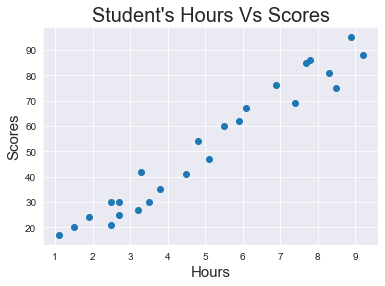

In [65]:
plt.scatter(X,y)
plt.title('Student\'s Hours Vs Scores',fontsize=20)
plt.xlabel('Hours',fontsize=15)
plt.ylabel('Scores',fontsize=15)
plt.show()

In [66]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=4)

In [70]:
model=LinearRegression()
model.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

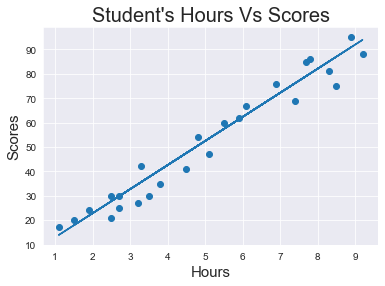

In [71]:
plt.scatter(X,y)
plt.plot(X,model.coef_*X+model.intercept_)
plt.title('Student\'s Hours Vs Scores',fontsize=20)
plt.xlabel('Hours',fontsize=15)
plt.ylabel('Scores',fontsize=15)
plt.show()

In [81]:
y_pred=model.predict(X_test)
y_pred[0:5]

array([40.60416792, 50.48181243, 27.76323006, 87.0290971 , 47.51851908])

In [86]:
print('training_score',metrics.r2_score(y_train,model.predict(X_train)))
print('testing_score',metrics.r2_score(y_pred,y_test))

training_score 0.9644771934967826
testing_score 0.8586736236786204


In [87]:
print('Mean Absolute Error {}'.format(metrics.mean_absolute_error(y_pred,y_test)))

Mean Absolute Error 6.88664034717618


In [89]:
preds_class=pd.DataFrame(y_pred)
preds_class.columns=['prediction']
original_class=pd.DataFrame(y_test)
original_class.columns=['original result']
result=pd.concat([preds_class,original_class],axis=1)
result.head()

,prediction,original result
0,40.604168,35
1,50.481812,54
2,27.763230,21
3,87.029097,75
4,47.518519,41


In [96]:
hours=9.25
res=model.predict([[hours]])
res[0]

94.43733048038095

In [98]:
import statsmodels.api as sn
X=sn.add_constant(data['Hours'])
lm=sn.OLS(data['Scores'],X).fit()
lm.summary()

C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Scores   R-squared:                       0.953
Model:                            OLS   Adj. R-squared:                  0.951
Method:                 Least Squares   F-statistic:                     465.8
Date:                Fri, 02 Oct 2020   Prob (F-statistic):           9.13e-17
Time:                        12:10:09   Log-Likelihood:                -77.514
No. Observations:                  25   AIC:                             159.0
Df Residuals:                      23   BIC:                             161.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.4837      2.532      0.981      0.337      -2.753       7.721
Hours          9.7758      0.453     21.583      0.000       8.839      10.713
==============================================================================
Omnibus:                        7.616   Durbin-Watson:                   1.460
Prob(Omnibus):                  0.022   Jarque-Bera (JB):                2.137
Skew:                          -0.216   Prob(JB):                        0.343
Kurtosis:                       1.634   Cond. No.                         13.0
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

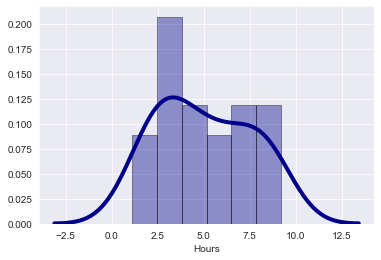

In [20]:
sns.distplot(data['Hours'],hist=True,kde=True,
            bins='auto',color='darkblue',
            hist_kws={'edgecolor':'black'},
            kde_kws={'linewidth':4})

Thank god!!!<br>
It's a good distribution.

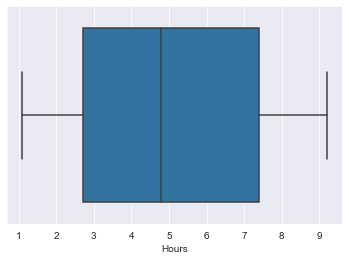

In [21]:
sns.boxplot(x='Hours',data=data)

Here, **sns's boxplot** clearly depicts there are no outliers.

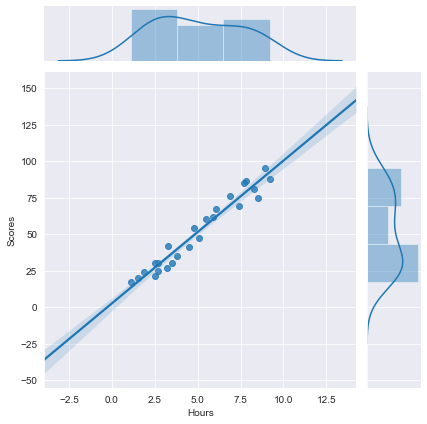

In [31]:
sns.jointplot(x='Hours',y='Scores',kind='reg',data=data)

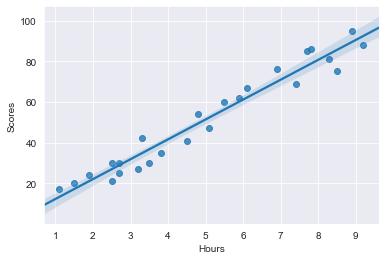

In [25]:
sns.regplot(x='Hours',y='Scores',scatter=True,fit_reg=True,data=data)

Here, we can see here good fit of regression plot.<br>
Then jumping into problem.